In [99]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt

"""A "suit" is an integer in the range 0..3, where 0=Clubs, 1=Diamonds, 2=Hearts, 3=Spades
A "rank" is an integer in the range 0..12, where 0 = 2 (deuce), 1 = 3, 11 = King, 12 = Ace. This is the cards in a suit arranged in rank order
A "card" is an integer in the range 0..51, hence
card = suit*13 + rank.
Suit = card/13
Rank = card%13"""

from itertools import combinations

def suit(card):
    """
    input: card as an integer
    output: suit as an integer
    """
    return card//13 #return floor of card/13, giving suit of card (encoded as an int)

def rank(card):
    """
    input: card as an integer
    output: suit as an integer
    """
    return card%13 #return rank of card (encoded as an int)

def hand(cards):
    """
    input: list of cards
    output: 52 bit string with 1s for every card in the hand"""
    hand = '0'*52
    for card in cards:
        hand[card]=1 #add that card to our hand
    return hand

def print_cards(cards):
    """
    input: list of cards as integers, or single integer
    prints card ranks and suits
    """
    if type(cards)==int: #single card
        cards = [cards]
    for card in cards:
        r = rank(card)
        if r<9:
            r = str(r+2)
        elif r==9:
            r = "Jack"
        elif r==10:
            r = "Queen"
        elif r==11:
            r = "King"
        elif r==12:
            r = "Ace"
        print("Rank: "+r)
        s = suit(card)
        if s==0:
            s = "Clubs"
        elif s ==1:
            s = "Diamonds"
        elif s ==2:
            s = "Hearts"
        elif s ==3:
            s = "Spades"
        print("Suit: "+s)
        print()
    
def hand_type(hand):
    """
    input: a poker hand of 5 cards
    output: a number expressing what type of poker hand it is (0 for no pair, 8 for straight flush)"""
    ranks = [0]*13
    suits = [0]*4
    best = 0 #best hand so far
    
    for card in hand: #O(N)
        ranks[rank(card)] += 1
        suits[suit(card)] += 1
    
    flush = 0
    straight = 0
    for s in suits: #O(1)
        if s==5: #if flush
            flush = 1
            
    #if straight
    r = 0 #indexing through all ranks
    v = 0 #progress towards a straight
    if ranks[12] == 1:
        v = 1 #ace low case
    while r < 13 and v < 5:
        if ranks[r] == 1:
            v += 1
        else:
            v = 0
        r += 1
    if v==5: straight = 1 #we have a straight
        
    if flush and straight: return 8 #straight flush
    
    three=0
    pair = 0
    for r in ranks:
        if r==4: return 7 #4 of a kind
        if r==3: three=1 #three of a kind
        if r==2: pair += 1 #pair
    
    if three and pair: return 6 #full house
    
    if flush: return 5
    
    if straight: return 4
    
    if three: return 3
    
    return pair
    
def hand_ranks(hand):
    """
    input: a poker hand
    output: integer list of ranks of hand in descending order
    """
    ranks = [card%13 for card in hand]
    ranks.sort(reverse=True); #sort list in descending order
    return(ranks)

def compare(hand1, hand2):
    """
    input: 2 5 card hands as lists of ints
    output: 1 if hand1 is better, 2 if hand2 is better, and 0 for tie"""
    val1 = hand_type(hand1)
    val2 = hand_type(hand2)
    if val1 > val2: 
        return 1
    elif val2 > val1:
        return 2
    
    else: #same hand_type
        r1 = hand_ranks(hand1)
        r2 = hand_ranks(hand2)
        
        #deal with 4 of a kind, full house, 3 of a kind, 2 pairs, and pair cases
        if val1==7:
            if r1[0]==r1[1]: four = r1[0] #finding where the four of a kind happens
            else: four = r1[4]
                
            if r2[0]==r2[1]: compare = r2[0] #finding where the four of a kind happens
            else: compare = r2[4]
                
            if four>compare: return 1
            elif compare>four: return 2
        
        #full house case
        if val1==6:
            if r1[0]==r1[1] and r1[1]==r1[2]: three = r1[0] #three of a kind
            else: three = r1[4]
                
            if r2[0]==r2[1] and r2[1]==r2[2]: compare = r2[0] #three of a kind
            else: compare = r2[4]
                
            if three>compare: return 1 #else pair gets compared
            elif compare>three: return 2
        
        if val1==3: #3 of a kind
            i = 0
            while r1.count(r1[i])!=3: #find the three of a kind
                i += 1
            three = r1[i]
            i = 0
            while r2.count(r2[i])!=3: #find the three of a kind
                i += 1
            compare = r2[i]
            
            if three>compare: return 1
            elif compare>three: return 2
            
        if val1==2: #2 pair
            pairs1 = [r for r in r1 if r1.count(r) > 1] #create list of pairs
            pairs2 = [r for r in r2 if r2.count(r) > 1]
            pairs1.sort(reverse=True) #descending order
            pairs2.sort(reverse=True)
            for i in range(5): #looking at each card in the hand (in descending order)
                if r1[i]>r2[i]: return 1
                elif r1[i]<r2[i]: return 2
        
        if val1==1: #pair
            i = 0
            while r1.count(r1[i])!=2: #find pair
                i += 1
            pair = r1[i]
            
            i = 0
            while r2.count(r2[i])!=2:
                i += 1
            compare = r2[i]
            
            if pair>compare: return 1
            elif compare>pair: return 2
            
        #if still equal, just compare ranks
        for i in range(5): #looking at each card in the hand (in descending order)
            if r1[i]>r2[i]: return 1
            elif r1[i]<r2[i]: return 2
            
        return 0 #tie
        

def best_hand(hand):
    """
    input: 7 card hand
    output: best 5 card hand_value from them"""
    all_hands = list(combinations(hand,5)) #list of all possible 5 card combinations of these 7 cards
    best = all_hands[0]
    for current in all_hands:
        if compare(best, current)==2: #if this hand is better than the best hand we have so far
            best = current
    
    return best
        
def hand_strength(hand, board, opps=1):
    """
    input: hole cards, board cards, number of opponents (default=1)
    output: percentile 'strength' of hand
    """
    wins = ties = 0
    N = 10000 #Monte Carlo sample size (for pre-flop case)
    cards = hand+board #concatenate the 2 lists
    deck = [x for x in list(range(52)) if x not in cards] #remaining cards in deck
    result=0
    
    #if all board cards: enumerate all possible opponent cards, calculate percentile --> analytically extend to n players
    if len(board) == 5:
        my_hand = best_hand(cards)
        all_opps = list(combinations(deck,2)) #list of all possible 2 card combinations of the remaining deck cards
        for opp in all_opps:
                opp_cards = list(opp)+board
                opp_hand = best_hand(opp_cards)
                result = compare(my_hand,opp_hand)
                if result == 1:
                    wins +=1
                elif result==0:
                    ties +=1
        result = (wins+ties/2)/990 #number of times my_hand wins or ties out of all possible combinations
    
    #if not all board cards: enumerate all possible cases and calculate
    elif len(board) == 4:
        for c in deck: #all possible 5th cards
            new_deck = [x for x in list(range(52)) if x not in cards+[c]]#remove c from the deck
            my_hand = best_hand(cards+[c])
            all_opps = list(combinations(deck,2)) #list of all possible 2 card combinations of the remaining deck cards
            for opp in all_opps:
                opp_cards = list(opp)+board+[c]
                opp_hand = best_hand(opp_cards)
                result = compare(my_hand,opp_hand)
                if result == 1:
                    wins +=1
                elif result==0:
                    ties +=1
        result= (wins+ties/2)/45540 #number of times my_hand wins or ties out of all possible combinations
    
    elif len(board) == 3:
        for m in range(len(deck)):
            for n in range(m+1,len(deck)):
                c = [deck[m],deck[n]] #turn and river
                my_hand = best_hand(cards+c)
                new_deck = [x for x in list(range(52)) if x not in cards+c]
                if n==10:
                    print(len(new_deck)) #debugging?
                for i in range(len(new_deck)):
                    for j in range(i+1,len(new_deck)):
                        opp_cards = [new_deck[i],new_deck[j]]+board+c
                        opp_hand = best_hand(opp_cards)
                        result = compare(my_hand,opp_hand)
                        if result == 1:
                            wins +=1
                        elif result==0:
                            ties +=1
        result= (wins+ties/2)/1070190 #number of times my_hand wins or ties out of all possible combinations
            
    #if no board cards: don't exhaustively search, sample using Monte Carlo
    elif len(board) == 0:
        for i in range(N):
            new_board = list(np.random.choice(deck,5,replace=False))
            my_hand = best_hand(cards+new_board)
            new_deck = [x for x in list(range(52)) if x not in cards+new_board]
            opp_cards = list(np.random.choice(new_deck,2,replace=False))
            opp_hand = best_hand(opp_cards+new_board)
            result = compare(my_hand,opp_hand)
            if result == 1:
                wins +=1
            elif result==0:
                ties +=1   
        result=(wins+ties/2)/N
    
    #if board has an incorrect amount (i.e. len(board) not in [0,3,4,5]) then return 0
    else:
        print("Incorrect board size. Board should have 0, 3, 4 or 5 cards. Input: ")
        print(board)
        
    return math.pow(result,opps)

In [100]:
#time trials of hand strength algorithm

deck = list(range(52))
start = time.clock()
num = 10

board = []
for i in range(num):
    my_hand = list(np.random.choice(deck,2,replace=False))
    new_deck = [x for x in list(range(52)) if x not in my_hand]
    board_size = 0
    board = list(np.random.choice(new_deck,board_size,replace=False))
    hs = hand_strength(my_hand,board)
    print_cards(my_hand)
    print_cards(board)
    print(hs)
    print()

runtime = time.clock()-start
print("Number of trials: "+str(num))
print("Number of cards on the board: "+str(board_size))
print("Time taken to run: "+str(runtime))
#.5 sec at river
# 7.2 sec at turn
# 8 min at flop
#pre-flop:
#N=100,000 time=2 min
#N=10,000 time=13 sec

Rank: Ace
Suit: Hearts

Rank: Jack
Suit: Spades

0.6423

Rank: 2
Suit: Diamonds

Rank: 2
Suit: Spades

0.51045

Rank: 4
Suit: Hearts

Rank: 7
Suit: Diamonds

0.3838

Rank: Jack
Suit: Diamonds

Rank: 6
Suit: Diamonds

0.50235

Rank: Queen
Suit: Hearts

Rank: 4
Suit: Clubs

0.49355

Rank: Jack
Suit: Hearts

Rank: 2
Suit: Hearts

0.4898

Rank: 9
Suit: Spades

Rank: King
Suit: Hearts

0.5826

Rank: 6
Suit: Spades

Rank: King
Suit: Spades

0.57245

Rank: 4
Suit: Spades

Rank: 9
Suit: Clubs

0.40955

Rank: 5
Suit: Hearts

Rank: King
Suit: Clubs

0.5418

Number of trials: 10
Number of cards on the board: 0
Time taken to run: 132.0351380000011


In [82]:
def chen_formula(cards):
    """
    input: 2 (hole) cards
    output: a score for the starting hands calculated by Bill Cheng, author or Mathematics of Poker
    http://www.thepokerbank.com/strategy/basic/starting-hand-selection/chen-formula/
    """
    ranks = hand_ranks(cards)
    score = 0
    if len(ranks)!=2:
        print("Chen Formula is meant for starting (hole) cards only ")
        return score
    high = ranks[0] #highest card
    if high>8: #face card or Ace
        score += high-3
        if high == 12:
            score += 1 #add 1 more Ace
    else:
        score += (high+2)/2
        
    if ranks[0] == ranks[1]: #pair
        score = score*2
        if high==2: #if 2 pair
            score += 1
    
    if suit(cards[0])==suit(cards[1]): #suited
        score += 2
        
    gap = high - ranks[1]
    if gap < 3:
        score = score-gap
    elif gap==3:
        score = score-4
    else:
        score = score-5
    if gap < 2 and high<10 and ranks[0]!=ranks[1]: #low gap, both cards less than Q, no pair (straight bonus)
        score += 1
        
    return math.ceil(score)
        

Number of trials: 50
Time taken to run: 6456.156534000001


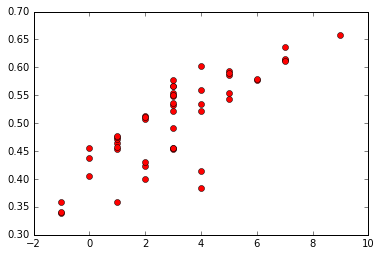

In [83]:
#comparing Monte Carlo estimation of starting cards to Chen formula
deck = list(range(52))
start = time.clock()
num = 50
chen_vals = []
hand_strengths = []

for i in range(num):
    my_hand = list(np.random.choice(deck,2,replace=False))
    #print_cards(my_hand)
    chen_vals.append(chen_formula(my_hand))
    hand_strengths.append(hand_strength(my_hand,[]))

runtime = time.clock()-start
print("Number of trials: "+str(num))
print("Time taken to run: "+str(runtime))

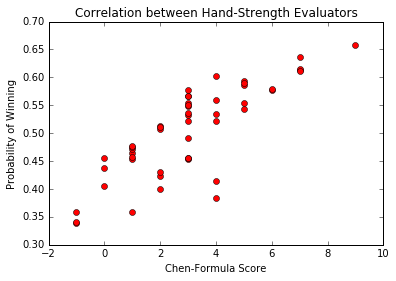

In [117]:
%matplotlib inline
chen_vals = np.array(chen_vals)
hand_strengths = np.array(hand_strengths)
m, b = np.polyfit(chen_vals, hand_strengths, 1) #linear line of best fit
#add line of best fit, correlation
plt.plot(chen_vals,hand_strengths, 'ro')
#plt.plot(chen_vals, m*hand_strengths+b, '-')
plt.xlabel('Chen-Formula Score')
plt.ylabel('Probability of Winning')
plt.title('Correlation between Hand-Strength Evaluators')
plt.show()

In [112]:
a = np.array([1,2,3,4])
3*a + 4

array([ 7, 10, 13, 16])